# <center>TTK4255 - Assignment 2 by Dinosshan Thiagarajah </center>

# 1 Image undistortion

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Kitti parameters
fx = 9.842439e+02
fy = 9.808141e+02
cx = 6.900000e+02
cy = 2.331966e+02
k1 = -3.728755e-01
k2 = 2.037299e-01
k3 = -7.233722e-02
p1 = 2.219027e-03
p2 = 1.383707e-03

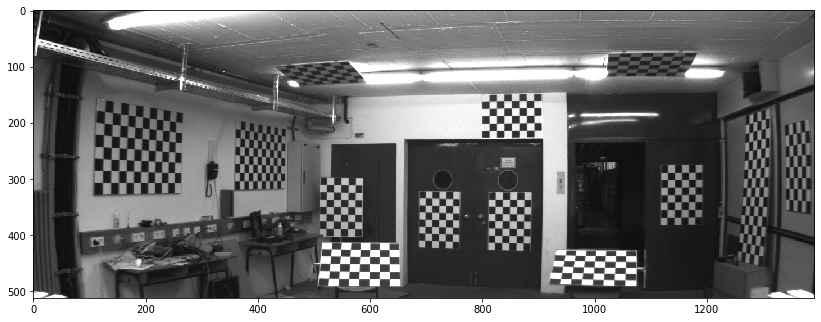

In [3]:
# Load images and visualize
img = plt.imread('data/kitti.jpg')
plt.figure(figsize=(14,10))
plt.imshow(img)

In [4]:
# Intrinsic parameter matrix
K = np.array([\
[fx,0,  cx],\
[0, fy, cy],\
[0, 0,  1]])

# Perspective projection matrix
PI = np.concatenate((np.eye(3),np.zeros((3,1))),axis=1)

# dst = np.linalg.pinv(K@PI)@np.array([[u_dst],[v_dst],[1]])
# x_dst = dst[0]
# y_dst = dst[1]

## Task 1 a)

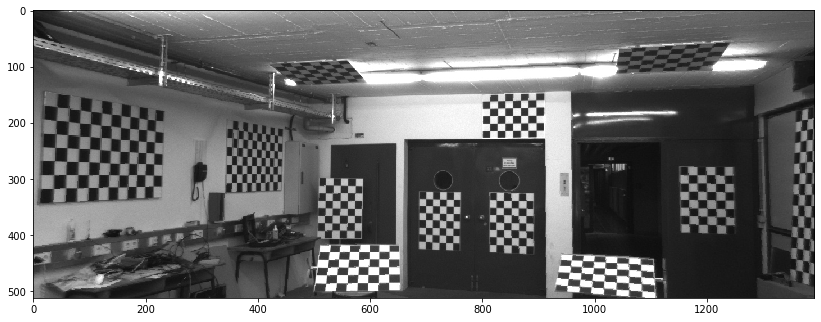

In [5]:
# Undistort image using extended camera model with distortion terms
def undistort_image(img, fx, fy, cx, cy, k1, k2, k3, p1, p2):
    img_undistorted = np.uint8(np.zeros(np.shape(img)))
    
    for v_dst in range(np.size(img,0)):
        for u_dst in range(np.size(img,1)):
            # Inverting equations (1)-(2)    
            x_dst = (u_dst-cx)/fx
            y_dst = (v_dst-cy)/fy

            # Compute the source image pixel coordinates under the distorted pinhole model
            r = np.sqrt(x_dst**2+y_dst**2) 
            delta_x = (k1*r**2+k2*r**4+k3*r**6)*x_dst+2*p1*x_dst*y_dst+p2*(r**2+2*x_dst**2)
            delta_y = (k1*r**2+k2*r**4+k3*r**6)*y_dst+p1*(r**2+2*y_dst**2)+2*p2*x_dst*y_dst

            # Equations (3)-(4)
            u_src = cx+fx*(x_dst+delta_x)
            v_src = cy+fy*(y_dst+delta_y)

            if u_src <= np.size(img,1) and v_src <= np.size(img,0):
                img_undistorted[v_dst,u_dst,:] = img[int(v_src),int(u_src),:]
    return img_undistorted

# Visualize undistorted image
img_undistorted = undistort_image(img,fx,fy,cx,cy,k1,k2,k3,p1,p2)
plt.figure(figsize=(14,10))
plt.imshow(img_undistorted)  

## Task 1 b)
Image seen by a camera with different intrinsic parameters can be generated by first undistort a distorted <br /> 
image as done above, and then distort the image with new intrinsic camera parameters. In order to distort <br /> 
the image (x,y) has to be calculated by inverting equations (3)-(4). Then pixel coordinates calculated <br />
by equations (3)-(4) with new parameters. 

## Task 1 c)
Since the Z is not changed when just the orientation is changed, image seen by a camera <br />
at different orientations can achieved by rotating the vectors spanning from projection <br />
center to each pixels on the image, and projecting to the image plane. 

## Task 1 d)
It is possible to translate the camera in x,y,z directions, but that means not all pixels will receive a value. <br />
In general however, camera at different positions receive some information that is not entirely encapsulated by a <br />
camera at a another location. This includes information about a different part of the world, and/or at different angles. <br />

Geometric changes (scaling, rotation of objects) happens as well when capturing image from a different position, which is <br /> 
not captured by a camera from another position.  

# 2 Camera calibration

## Task 2 a)
Intrinsic parameters: fx, fy, cx, cy, k1, k2, k3, p1, p2 <br />
Extrinsic parameters: checkerboards on the picture<br />
There are 13 checkerboards in total, 6 extrinsic parameters per checkerboard, meaning 78 in total.

## Task 2 b)
#### Advantages:
- Easy to print/make 2D calibration object in practice compared to 3D
    - it is important that the calibration object is very precise in its dimensions
- Easy to capture images of planar objects compared 3D, to calculate the instrinsic parameters accurately 

## Task 2 c)
#### Print
- imperfections on paper can affect accuracy and calibration
- easy to move around and capture images to cover the whole field of view

#### Screen
- no imperfections often on screen
- bad screen resolution can affect accuracy 

## Task 2 d)
There are 4 (cx,cy,fx,fy) intinsics and 6 (X,Y,Z,psi,theta,phi) extrinsics parameters to calculate <br />, 
in total 10 parameters to calculate. With two equations per correspondance, one would need atleast 5 <br /> 
correspondances to estimate the intinsics and extrinsics.

## Task 2 e)
One case of ambigiousness is that one can achieve the same projection by either swapping fx and fy <br />
or just rotating the image by 90 degrees and obtain the same image.  

## Task 2 f)
One example is with a camera having radial distortion. During calibration, three images are <br />
 captured (minimum requirement for Matlab calibration toolbox) arround the center. The reprojection <br />
 can be good, but the calibration can miss the radial distortion part due to lack images from around <br />
 the edges, which can lead to not compensating for the distortion.  <br /> 
 <br />
 A different case is that from 2 e). Even though the reprojection was accurate for the image in 2 e) <br />
 for a certain set of parameters, this does not mean that a checkerboard with different position and <br />
 orientation will be reprojected correctly with the same set of estimated parameters due to multiple solutions <br />
 existing for calibration in 2 e).